### Probability Density Functions
The derivative of a CDF is called the **probability density function**, or PDF.

The PDF of an exponential distribution is:
```
CDF_expo = 1 - e^(-kx)

PDF_expo = ke^(-kx)
```

In [1]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
from cycler import cycler

matplotlib.style.use("dark_background")
%matplotlib inline
rcParams["figure.figsize"] = (12, 6)
rcParams["axes.prop_cycle"] = cycler(color=["#4299E1", "#F56565", "#48BB78", "#ED8936", "#9F7AEA", "#ECC94B"])
rcParams["axes.facecolor"] = "#1A202C"
rcParams["axes.edgecolor"] = "#A0AEC0"
rcParams["axes.grid"] = True
rcParams["grid.color"] = "#A0AEC0"
rcParams["grid.alpha"] = 0.7
rcParams["axes.titlecolor"] = "#A0AEC0"
rcParams["axes.labelcolor"] = "#A0AEC0"
rcParams["xtick.color"] = "#A0AEC0"
rcParams["ytick.color"] = "#A0AEC0"

Let's see how they differ from each other when graphed:

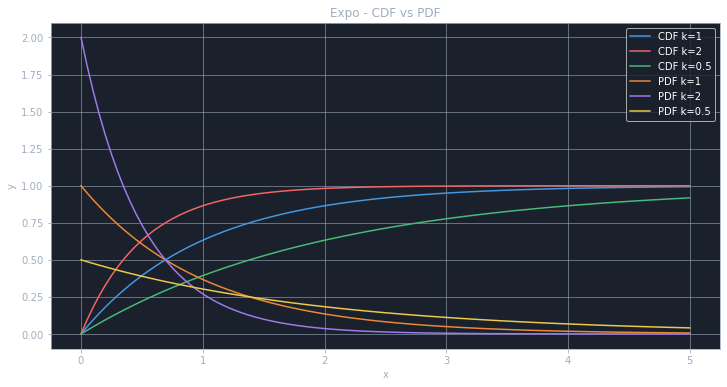

In [2]:
import pandas as pd
import numpy as np

def ExpoCDF(x, k):
    return 1 - np.exp(x * -k)

def ExpoPDF(x, k):
    return k * np.exp(x * -k)

xValues = np.linspace(0, 5, 100)

plt.plot(xValues, ExpoCDF(xValues, 1), label="CDF k=1")
plt.plot(xValues, ExpoCDF(xValues, 2), label="CDF k=2")
plt.plot(xValues, ExpoCDF(xValues, 0.5), label="CDF k=0.5")
plt.plot(xValues, ExpoPDF(xValues, 1), label="PDF k=1")
plt.plot(xValues, ExpoPDF(xValues, 2), label="PDF k=2")
plt.plot(xValues, ExpoPDF(xValues, 0.5), label="PDF k=0.5")
plt.title("Expo - CDF vs PDF")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

In [3]:
import ipywidgets as widgets

def kWidget(k1=1, k2=1):
    plt.plot(xValues, ExpoCDF(xValues, k1))
    plt.plot(xValues, ExpoPDF(xValues, k2))
    plt.show()
    
widgets.interactive(kWidget, k1=(0, 3, 0.1), k2=(0, 3, 0.1))

interactive(children=(FloatSlider(value=1.0, description='k1', max=3.0), FloatSlider(value=1.0, description='k…

Now, let's do the same thing for the normal distribution:

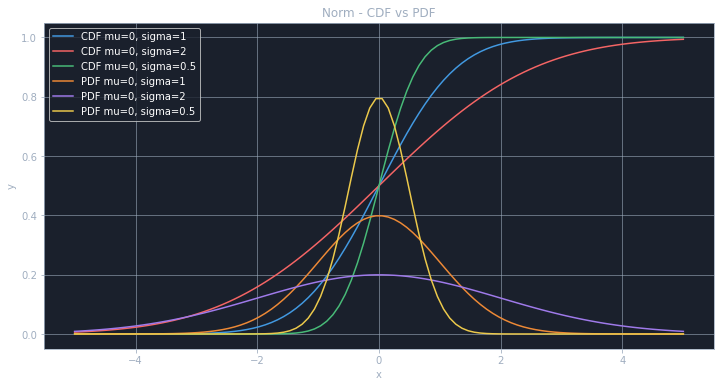

In [4]:
from scipy import stats

def NormCDF(x, mean, std):
    return stats.norm.cdf(x, mean, std)

def NormPDF(x, mean, std):
    return stats.norm.pdf(x, mean, std)

xValues = np.linspace(-5, 5, 100)
plt.plot(xValues, NormCDF(xValues, 0, 1), label="CDF mu=0, sigma=1")
plt.plot(xValues, NormCDF(xValues, 0, 2), label="CDF mu=0, sigma=2")
plt.plot(xValues, NormCDF(xValues, 0, 0.5), label="CDF mu=0, sigma=0.5")
plt.plot(xValues, NormPDF(xValues, 0, 1), label="PDF mu=0, sigma=1")
plt.plot(xValues, NormPDF(xValues, 0, 2), label="PDF mu=0, sigma=2")
plt.plot(xValues, NormPDF(xValues, 0, 0.5), label="PDF mu=0, sigma=0.5")
plt.title("Norm - CDF vs PDF")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=2)

##### PDF vs PMF
Probability density function has a smooth curve when graphed, while probability mass function is a normed histogram of some empirical data and is therefore in steps and not a smooth curve.

#### Kernel Density Estimation
Kernel Density Estimation (KDE) is an algorithm that takes a sample and finds an appropriately smooth PDF that fits the data.

Here is how to use it by using birth weights as our data:

Text(0, 0.5, 'KDE')

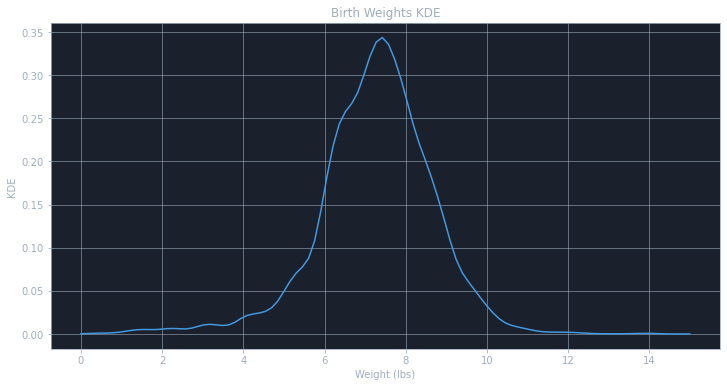

In [5]:
df = pd.read_pickle("nsfg_data.pkl")
live = df[df["outcome"] == 1]
weights = live["totalwgt_lb"].dropna()
pregnancyLengths = live["prglngth"].dropna()

# Let's first get a random sample from a normal distribution
kde = stats.gaussian_kde(weights)
xValues = np.linspace(0, 15, 100)
estimate = kde.evaluate(xValues)

#plt.plot(xValues, realDataModel, label="model")
plt.plot(xValues, estimate, label="weights KDE")
plt.title("Birth Weights KDE")
plt.xlabel("Weight (lbs)")
plt.ylabel("KDE")

After plotting the KDE of the sample, we just gotta find the right PDF that will match the shape.

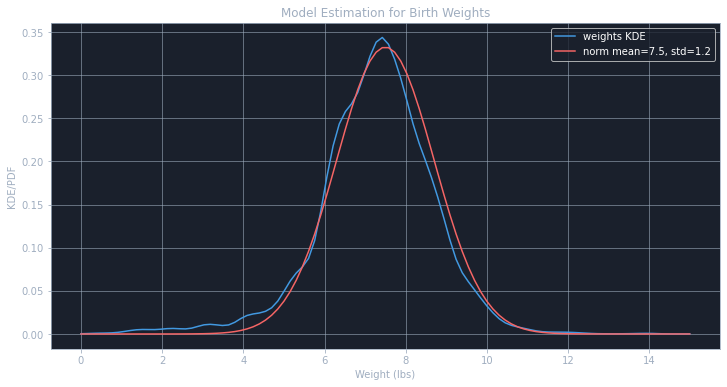

In [6]:
mean = 7.5
std = 1.2

model = NormPDF(xValues, mean, std)

plt.plot(xValues, estimate, label="weights KDE")
plt.plot(xValues, model, label="norm mean=7.5, std=1.2")
plt.title("Model Estimation for Birth Weights")
plt.xlabel("Weight (lbs)")
plt.ylabel("KDE/PDF")
plt.legend()

As we can see, the PDF that will closely fit this KDE is the Normal PDF, with `mean = 7.5` and `std = 1.2` approximately.

#### Distribution Framework
Here is how PMF, discrete CDF, PDF, and continuous CDF relate to each other:

![A framework that relates representations of distribution functions.](thinkstats2026.png)

#### Moments
Any time you take a sample and reduce it to a single number, that number is a statistic. Some examples of this from a given sample are the mean, variance, median, and interquartile range.

A **raw moment** is also a statistic. If you have a sample, the *kth* raw moment is:

In [28]:
def RawMoment(sample, k):
    return sum(x**k for x in sample) / len(sample)

When `k=1`, the result is the mean of the sample.

However, the **central moment** is more useful, which is the x's subtracted by the mean, like so:

In [29]:
def CentralMoment(sample, k):
    mean = RawMoment(sample, 1)
    return sum((x - mean)**k for x in sample) / len(sample)

When `k=2`, the resulting central moment is the variance of the sample:

In [26]:
CentralMoment(pregnancyLengths, 2)

7.301863788195474

And the standard deviation is the square root of this variance:

In [25]:
np.sqrt(CentralMoment(pregnancyLengths, 2))

2.7021961046888276

In [27]:
pregnancyLengths.std()

2.702343810070593

#### Skewness
**Skewness** is a property that describes the shape of a distribution. If the distribution is symmetric around its mean, then it is unskewed. **Right skewed** means the values extend farther to the right, **left skewed** is to the left.

However, skewness only describes the shape and says nothing about whether the sampling process was biased.

Here is how to calculate the skewness of a given sample:

In [32]:
# This is normalizing the central moment, so it will have no units
def StandardizedMoment(sample, k):
    var = CentralMoment(sample, 2)
    std = np.sqrt(var)
    return CentralMoment(sample, k) / std**k

def Skewness(sample):
    return StandardizedMoment(sample, 3)

print(Skewness(weights))
print(Skewness(pregnancyLengths))

-0.5895062687577989
-2.855300690938659


However, in practice, computing the skewness of a sample is usually not a good idea, since any outliers have a disproportionate effect on the skewness.

Another way to see how asymmetric a distribution is is by comparing the sample mean and the median. Extreme values have more effect on the mean than on the median, therefore when `mean < median`, the distribution skews left, but right otherwise.

**Pearson's median skewness coefficient** is calculated as such: `3 * (mean - median) / std`. This statistic is robust, which means it's less vulnerable to the effect of outliers. 
Here is how to code it:

In [34]:
def PearsonMedianSkewness(sample):
    median = sample.median()
    mean = RawMoment(sample, 1)
    var = CentralMoment(sample, 2)
    std = np.sqrt(var)
    return 3 * (mean - median) / std

print(PearsonMedianSkewness(weights))
print(PearsonMedianSkewness(pregnancyLengths))

-0.23300028954731833
-0.48787019646027596


Remember, we can only interpret whether the distribution skews left or right from this.